In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [2]:
nutrients=pd.read_csv("/Users/ekman/OneDrive/Desktop/nutrients_csvfile.csv")
nutrients.head(10)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0,39,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,t,t,0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,t,t,1,42,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0,11,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0,70,Dairy products


In [3]:
display(nutrients)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
329,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
330,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
331,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
332,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [4]:
#cleaning of data
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)


In [5]:
nutrients.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat.Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

In [6]:
#cleaning of data(removing comma in protien,calories,grams etc to convert them to int and float values)

nutrients = nutrients.replace(",","",regex=True)
nutrients=nutrients.replace(" ","",regex=True)
nutrients=nutrients.drop_duplicates(subset="Food",keep="first")
nutrients['Protein'] = nutrients['Protein'].replace("-1","", regex=True)
nutrients['Fiber'] = nutrients['Fiber'].replace("a","", regex=True)

In [7]:
#converting objects to int and float respectively

nutrients['Grams'] = pd.to_numeric(nutrients['Grams'])
nutrients['Calories'] = pd.to_numeric(nutrients['Calories'])
nutrients['Protein'] = pd.to_numeric(nutrients['Protein'])
nutrients['Fat'] = pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat'] = pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber'] = pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs'] = pd.to_numeric(nutrients['Carbs'])


In [8]:
#coverting weight units to grams

nutrients['Calories'] = nutrients['Calories'] / nutrients['Grams']
nutrients['Protein'] = nutrients['Protein'] / nutrients['Grams']
nutrients['Fat'] = nutrients['Fat'] / nutrients['Grams']
nutrients['Sat.Fat'] = nutrients['Sat.Fat'] / nutrients['Grams']
nutrients['Fiber'] = nutrients['Fiber'] / nutrients['Grams']
nutrients['Carbs'] = nutrients['Carbs'] / nutrients['Grams']

In [9]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 333
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      328 non-null    object 
 1   Measure   328 non-null    object 
 2   Grams     328 non-null    int64  
 3   Calories  327 non-null    float64
 4   Protein   327 non-null    float64
 5   Fat       328 non-null    float64
 6   Sat.Fat   326 non-null    float64
 7   Fiber     327 non-null    float64
 8   Carbs     328 non-null    float64
 9   Category  328 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 28.2+ KB


In [10]:
#food having highest calories
n1=nutrients.loc[nutrients['Calories'].idxmax()]
display(n1)


Food                       Lard
Measure                  1/2cup
Grams                       110
Calories               9.018182
Protein                     0.0
Fat                         1.0
Sat.Fat                0.836364
Fiber                       0.0
Carbs                       0.0
Category    FatsOilsShortenings
Name: 33, dtype: object

In [11]:
#food having highest protien
n2=nutrients.loc[nutrients['Protein'].idxmax()]
print(n2)

Food            Oysters
Measure         6-8med.
Grams               230
Calories       1.004348
Protein        1.008696
Fat            1.013043
Sat.Fat        1.017391
Fiber          1.021739
Carbs          1.026087
Category    FishSeafood
Name: 82, dtype: object


In [12]:
#food having highest fat content
nutrients['fats']=nutrients['Fat']+nutrients['Sat.Fat']
n3=nutrients.loc[nutrients['fats'].idxmax()]
print(n3)

Food            Oysters
Measure         6-8med.
Grams               230
Calories       1.004348
Protein        1.008696
Fat            1.013043
Sat.Fat        1.017391
Fiber          1.021739
Carbs          1.026087
Category    FishSeafood
fats           2.030435
Name: 82, dtype: object


In [13]:
#food having highest fiber
n4=nutrients.loc[nutrients['Fiber'].idxmax()]
print(n4)

Food            Oysters
Measure         6-8med.
Grams               230
Calories       1.004348
Protein        1.008696
Fat            1.013043
Sat.Fat        1.017391
Fiber          1.021739
Carbs          1.026087
Category    FishSeafood
fats           2.030435
Name: 82, dtype: object


In [14]:
#food having highest Carbs
n5=nutrients.loc[nutrients['Carbs'].idxmax()]
display(n5)

Food                         Branflakes
Measure                            1cup
Grams                                25
Calories                           4.68
Protein                            0.12
Fat                                 0.0
Sat.Fat                             0.0
Fiber                             0.004
Carbs                              1.28
Category    Breadscerealsfastfoodgrains
fats                                0.0
Name: 219, dtype: object

In [15]:
#food having minimum Calories
c1=nutrients.loc[nutrients['Calories'].idxmin()]
print(c1)

Food        CarbonateddrinksArtificiallysweetened
Measure                                     12oz.
Grams                                         346
Calories                                      0.0
Protein                                       0.0
Fat                                           0.0
Sat.Fat                                       0.0
Fiber                                         0.0
Carbs                                         0.0
Category                   DrinksAlcoholBeverages
fats                                          0.0
Name: 326, dtype: object


In [16]:
#food having minimum Protein
c2=nutrients.loc[nutrients['Protein'].idxmin()]
print(c2)

Food                     Butter
Measure                     1T.
Grams                        14
Calories               7.142857
Protein                     0.0
Fat                    0.785714
Sat.Fat                0.714286
Fiber                       0.0
Carbs                       0.0
Category    FatsOilsShortenings
fats                        1.5
Name: 29, dtype: object


In [17]:
#food having highest fat content
nutrients['fats']=nutrients['Fat']+nutrients['Sat.Fat']
c3=nutrients.loc[nutrients['fats'].idxmin()]
print(c3)

Food             Milkskim
Measure              1qt.
Grams                 984
Calories         0.365854
Protein          0.036585
Fat                   0.0
Sat.Fat               0.0
Fiber                 0.0
Carbs            0.052846
Category    Dairyproducts
fats                  0.0
Name: 1, dtype: object


In [18]:
#food having highest fiber
c4=nutrients.loc[nutrients['Fiber'].idxmin()]
print(c4)

Food            Cows'milk
Measure              1qt.
Grams                 976
Calories          0.67623
Protein          0.032787
Fat              0.040984
Sat.Fat          0.036885
Fiber                 0.0
Carbs             0.04918
Category    Dairyproducts
fats             0.077869
Name: 0, dtype: object


In [19]:
#food having highest Carbs
c4=nutrients.loc[nutrients['Carbs'].idxmin()]
print(c4)

Food              Cheddar
Measure         1-in.cube
Grams                  17
Calories         4.117647
Protein          0.235294
Fat              0.352941
Sat.Fat          0.294118
Fiber                 0.0
Carbs                 0.0
Category    Dairyproducts
fats             0.647059
Name: 20, dtype: object


In [20]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

b1=nutrients[nutrients['Category']=='Dairyproducts']
display(b1.sort_values(by='Grams',ascending=False))
print("number of items is:",b1.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
4,Fortifiedmilk,6cups,1419,0.967583,0.062720,0.029598,0.016209,0.000987,0.083862,Dairyproducts,0.045807
1,Milkskim,1qt.,984,0.365854,0.036585,0.000000,0.000000,0.000000,0.052846,Dairyproducts,0.000000
0,Cows'milk,1qt.,976,0.676230,0.032787,0.040984,0.036885,0.000000,0.049180,Dairyproducts,0.077869
9,(1/2cupicecream),2cups,540,1.277778,0.044444,0.044444,0.040741,0.000000,0.129630,Dairyproducts,0.085185
10,Cocoa,1cup,252,0.932540,0.031746,0.043651,0.039683,0.000000,0.103175,Dairyproducts,0.083333
3,Evaporatedundiluted,1cup,252,1.369048,0.063492,0.079365,0.071429,0.000000,0.095238,Dairyproducts,0.150794
11,skim.milk,1cup,250,0.512000,0.072000,0.016000,0.012000,0.004000,0.052000,Dairyproducts,0.028000
12,(cornstarch),1cup,248,1.108871,0.036290,0.040323,0.036290,0.000000,0.161290,Dairyproducts,0.076613
13,Custard,1cup,248,1.149194,0.052419,0.056452,0.044355,0.000000,0.112903,Dairyproducts,0.100806
2,Buttermilk,1cup,246,0.516260,0.036585,0.020325,0.016260,0.000000,0.052846,Dairyproducts,0.036585


number of items is: 28


In [21]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

b2=nutrients[nutrients['Category']=='FishSeafood']
display(b2.sort_values(by='Grams',ascending=False))
print("number of items is:",b2.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
82,Oysters,6-8med.,230,1.004348,1.008696,1.013043,1.017391,1.021739,1.026087,FishSeafood,2.030435
75,Fishsticksfried,5,112,1.785714,0.169643,0.089286,0.044643,0.000000,0.071429,FishSeafood,0.133929
73,Cod,31/2oz.,100,1.700000,0.280000,0.050000,0.000000,0.000000,0.000000,FishSeafood,0.050000
80,Lobster,aver.,100,0.920000,0.180000,0.010000,0.000000,0.000000,0.000000,FishSeafood,0.010000
79,Herring,1small,100,2.110000,0.220000,0.130000,0.000000,0.000000,0.000000,FishSeafood,0.130000
78,Halibut,31/2oz.,100,1.820000,0.260000,0.080000,0.000000,0.000000,0.000000,FishSeafood,0.080000
76,Flounder,31/2oz.,100,2.000000,0.300000,0.080000,0.000000,0.000000,0.000000,FishSeafood,0.080000
89,Swordfish,1steak,100,1.800000,0.270000,0.060000,0.000000,0.000000,0.000000,FishSeafood,0.060000
86,Scallops,31/2oz.,100,1.040000,0.180000,0.080000,0.000000,0.000000,0.100000,FishSeafood,0.080000
74,Crabmeat,3oz.,85,1.058824,0.164706,0.023529,0.000000,0.000000,0.011765,FishSeafood,0.023529


number of items is: 19


In [22]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

b3=nutrients[nutrients['Category']=='VegetablesA-E']
display(b3.sort_values(by='Grams',ascending=False))
print("number of item is:",b3.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
96,Redkidney,1cup,260,0.884615,0.057692,0.003846,0.00,0.009615,0.161538,VegetablesA-E,0.003846
95,Navybakedwithpork,3/4cup,200,1.250000,0.055000,0.030000,0.03,0.010000,0.185000,VegetablesA-E,0.060000
113,cookedorcanned,1cup,200,0.850000,0.025000,0.000000,0.00,0.008000,0.205000,VegetablesA-E,0.000000
94,Limadrycooked,1cup,192,1.354167,0.083333,0.000000,0.00,0.010417,0.250000,VegetablesA-E,0.000000
115,Dandeliongreens,1cup,180,0.444444,0.027778,0.005556,0.00,0.017778,0.088889,VegetablesA-E,0.005556
116,Eggplant,1cup,180,0.166667,0.011111,0.000000,0.00,0.005556,0.050000,VegetablesA-E,0.000000
103,Steamedcabbage,1cup,170,0.235294,0.011765,0.000000,0.00,0.007647,0.052941,VegetablesA-E,0.000000
99,Beetroots,1cup,165,0.006061,0.072727,0.000000,NaN,0.000000,0.004848,VegetablesA-E,NaN
93,Lima,1cup,160,0.875000,0.050000,0.000000,0.00,0.018750,0.150000,VegetablesA-E,0.000000
100,Broccoli,1cup,150,0.300000,0.033333,0.000000,0.00,0.012667,0.053333,VegetablesA-E,0.000000


number of item is: 27


In [23]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

b4=nutrients[nutrients['Category']=='VegetablesF-P']
display(b4.sort_values(by='Grams',ascending=False))
print("number of item is:",b4.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
127,Onions,1,210,0.380952,0.009524,0.000000,0.0,0.007619,0.085714,VegetablesF-P,0.000000
121,Lentils,1cup,200,1.060000,0.075000,0.000000,0.0,0.012000,0.190000,VegetablesF-P,0.000000
130,Parsnips,1cup,155,0.612903,0.012903,0.006452,0.0,0.019355,0.141935,VegetablesF-P,0.006452
120,Lambsquarterssteamed,1cup,150,0.320000,0.033333,0.000000,0.0,0.021333,0.046667,VegetablesF-P,0.000000
119,Kohlrabi,1cup,140,0.285714,0.014286,0.000000,0.0,0.010714,0.064286,VegetablesF-P,0.000000
125,Mustardgreens,1,140,0.214286,0.021429,0.000000,0.0,0.008571,0.042857,VegetablesF-P,0.000000
124,Mushroomscanned,4,120,0.100000,0.016667,0.000000,0.0,0.000000,0.033333,VegetablesF-P,0.000000
118,Kale,1cup,110,0.409091,0.036364,0.009091,0.0,0.008182,0.072727,VegetablesF-P,0.009091
123,Iceberg,1/4head,100,0.130000,0.000000,0.000000,0.0,0.005000,0.030000,VegetablesF-P,0.000000
122,Lettuce,1/4head,100,0.140000,0.010000,0.000000,0.0,0.005000,0.020000,VegetablesF-P,0.000000


number of item is: 14


In [24]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

b5=nutrients[nutrients['Category']=='VegetablesR-Z']
display(b5.sort_values(by='Grams',ascending=False))
print("number of item is:",b5.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
154,Tomatoes,1cup,240,0.208333,0.008333,0.000000,0.000000,0.004167,0.037500,VegetablesR-Z,0.000000
156,Tomatojuice,1cup,240,0.208333,0.008333,0.000000,0.000000,0.002500,0.041667,VegetablesR-Z,0.000000
150,Squash,1cup,210,0.166667,0.004762,0.000000,0.000000,0.002857,0.038095,VegetablesR-Z,0.000000
141,PotatoesMashedwithmilkandbutter,1cup,200,1.150000,0.020000,0.060000,0.055000,0.003500,0.140000,VegetablesR-Z,0.115000
148,Soybeans,1cup,200,1.300000,0.110000,0.055000,0.000000,0.016000,0.100000,VegetablesR-Z,0.055000
151,Wintermashed,1cup,200,0.475000,0.020000,0.000000,0.000000,0.013000,0.115000,VegetablesR-Z,0.000000
153,Candied,1med.,175,1.342857,0.011429,0.034286,0.028571,0.008571,0.457143,VegetablesR-Z,0.062857
159,Turnipssteamed,1cup,155,0.258065,0.006452,0.000000,0.000000,0.011613,0.058065,VegetablesR-Z,0.000000
155,Raw2by21/2,1med.,150,0.200000,0.006667,0.000000,0.000000,0.004000,0.040000,VegetablesR-Z,0.000000
138,Pepperswithbeefandcrumbs,1med.,150,1.700000,0.126667,0.060000,0.053333,0.006667,0.160000,VegetablesR-Z,0.113333


number of item is: 28


In [25]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

f1=nutrients[nutrients['Category']=='FruitsA-F']
display(f1.sort_values(by='Grams',ascending=False))
print("number of items is:",f1.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
173,Cantaloupe,1/2med.,380,0.105263,0.002632,0.000000,0.000000,0.005789,0.023684,FruitsA-F,0.000000
176,Cranberrysaucesweetened,1cup,277,1.913357,0.000000,0.000000,0.000000,0.004332,0.512635,FruitsA-F,0.000000
174,Cherries,1cup,257,0.389105,0.007782,0.003891,0.000000,0.007782,0.101167,FruitsA-F,0.003891
181,Fruitcocktailcanned,1cup,256,0.761719,0.003906,0.000000,0.000000,0.001953,0.195312,FruitsA-F,0.000000
161,Applejuicecanned,1cup,250,0.500000,0.000000,0.000000,0.000000,0.000000,0.136000,FruitsA-F,0.000000
165,Apricots,1cup,250,0.880000,0.008000,0.000000,0.000000,0.004000,0.228000,FruitsA-F,0.000000
172,Blueberries,1cup,250,0.980000,0.004000,0.000000,0.000000,0.008000,0.260000,FruitsA-F,0.000000
168,Nectarorjuice,1cup,250,0.560000,0.004000,0.000000,0.000000,0.008000,0.144000,FruitsA-F,0.000000
164,Stewedorcanned,1cup,240,0.416667,0.000000,0.000000,0.000000,0.008333,0.108333,FruitsA-F,0.000000
177,Dates,1cup,178,2.837079,0.022472,0.000000,0.000000,0.020225,0.752809,FruitsA-F,0.000000


number of items is: 22


In [26]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

f2=nutrients[nutrients['Category']=='FruitsG-P']
display(f2.sort_values(by='Grams',ascending=False))
print("number of items is:",f2.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
183,"Grapefruitfresh5""diameter",01-Feb,285,0.175439,0.003509,0.000000,0.000000,0.003509,0.049123,FruitsG-P,0.000000
208,Prunes,1cup,270,1.111111,0.011111,0.003704,0.000000,0.002963,0.300000,FruitsG-P,0.003704
203,PineappleCrushed,1cup,260,0.788462,0.003846,0.000000,0.000000,0.002692,0.211538,FruitsG-P,0.000000
197,Peaches,1cup,257,0.778210,0.003891,0.000000,0.000000,0.003891,0.202335,FruitsG-P,0.000000
206,Plums,1cup,256,0.722656,0.003906,0.000000,0.000000,0.002734,0.195312,FruitsG-P,0.000000
199,Pears,1cup,255,0.764706,0.003922,0.000000,0.000000,0.007843,0.196078,FruitsG-P,0.000000
205,Pineapplejuice,1cup,250,0.480000,0.004000,0.000000,0.000000,0.000800,0.128000,FruitsG-P,0.000000
187,Grapejuice,1cup,250,0.640000,0.004000,0.000000,0.000000,0.000000,0.168000,FruitsG-P,0.000000
194,Orangejuice,8oz.or,250,0.448000,0.008000,0.000000,0.000000,0.000800,0.100000,FruitsG-P,0.000000
182,Grapefruitsections,1cup,250,0.680000,0.004000,0.000000,0.000000,0.002000,0.176000,FruitsG-P,0.000000


number of items is: 27


In [27]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

f3=nutrients[nutrients['Category']=='FruitsR-Z']
display(f3.sort_values(by='Grams',ascending=False))
print("number of items is:",f3.shape[0])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
217,Watermelon,1wedge,925,0.129730,0.002162,0.001081,0.0,0.003892,0.031351,FruitsR-Z,0.001081
213,Rhubarbsweetened,1cup,270,1.425926,0.003704,0.000000,0.0,0.007037,0.362963,FruitsR-Z,0.000000
214,Strawberries,1cup,227,1.066079,0.004405,0.000000,0.0,0.005727,0.264317,FruitsR-Z,0.000000
215,Raw,1cup,149,0.362416,0.000000,0.000000,0.0,0.012752,0.080537,FruitsR-Z,0.000000
216,Tangerines,Imed.,114,0.350877,0.008772,0.000000,0.0,0.008772,0.087719,FruitsR-Z,0.000000
211,Raspberries,1/2cup,100,1.000000,0.000000,0.000000,0.0,0.020000,0.250000,FruitsR-Z,0.000000
212,Rawred,3/4cup,100,0.570000,0.000000,0.000000,0.0,0.050000,0.140000,FruitsR-Z,0.000000
210,Raisins,1/2cup,88,2.613636,0.022727,0.000000,0.0,0.007955,0.931818,FruitsR-Z,0.000000


number of items is: 8


In [28]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

f4=nutrients[nutrients['Category']=='Breadscerealsfastfoodgrains']
display(f4.sort_values(by='Grams',ascending=False))
print("number of items is:",f4.shape[0])


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
223,Whole-wheat,1-lb.loaf,454,2.422907,0.105727,0.030837,0.022026,0.148678,0.475771,Breadscerealsfastfoodgrains,0.052863
222,White20slicesor,1-lb.loaf,454,2.698238,0.085903,0.033040,0.026432,0.019824,0.504405,Breadscerealsfastfoodgrains,0.059471
256,Spanishrice,1cup,250,0.868000,0.016000,0.016000,0.000000,0.004800,0.160000,Breadscerealsfastfoodgrains,0.016000
255,withtomatoesandcheese,1cup,250,0.840000,0.024000,0.020000,0.012000,0.002000,0.144000,Breadscerealsfastfoodgrains,0.032000
254,Spaghettiwithmeatsauce,1cup,250,1.140000,0.052000,0.040000,0.024000,0.002000,0.140000,Breadscerealsfastfoodgrains,0.064000
227,Corngritscooked,1cup,242,0.495868,0.033058,0.000000,0.000000,0.000826,0.111570,Breadscerealsfastfoodgrains,0.000000
231,Farina,1cup,238,0.441176,0.012605,0.000000,0.000000,0.033613,0.092437,Breadscerealsfastfoodgrains,0.000000
239,Oatmeal,1cup,236,0.635593,0.021186,0.012712,0.008475,0.019492,0.110169,Breadscerealsfastfoodgrains,0.021186
236,Bakedwithcheese,1cup,220,2.159091,0.081818,0.113636,0.109091,0.000000,0.200000,Breadscerealsfastfoodgrains,0.222727
246,Rice,1cup,208,3.596154,0.072115,0.014423,0.000000,0.005769,0.740385,Breadscerealsfastfoodgrains,0.014423


number of items is: 44


In [29]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

s1=nutrients[nutrients['Category']=='Soups']
display(s1.sort_values(by='Grams',ascending=False))
print("number of items is:",s1.shape[0])


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
267,Clamchowder,1cup,255,0.333333,0.019608,0.007843,0.031373,0.001961,0.047059,Soups,0.039216
268,Creamsoups,1cup,255,0.784314,0.027451,0.047059,0.043137,0.004706,0.070588,Soups,0.090196
264,Beefsoup,1cup,250,0.400000,0.024000,0.016000,0.016000,0.002000,0.044000,Soups,0.032000
263,Beansoups,1cup,250,0.760000,0.032000,0.020000,0.016000,0.002400,0.120000,Soups,0.036000
266,chickensoup,1cup,250,0.300000,0.016000,0.008000,0.008000,0.000000,0.040000,Soups,0.016000
269,Noodle,1cup,250,0.460000,0.024000,0.016000,0.012000,0.000800,0.052000,Soups,0.028000
272,Vegetable,1cup,250,0.320000,0.016000,0.008000,0.008000,0.000000,0.056000,Soups,0.016000
270,Split-peasoup,1cup,250,0.588000,0.032000,0.012000,0.012000,0.002000,0.100000,Soups,0.024000
271,Tomatosoup,1cup,245,0.714286,0.024490,0.028571,0.024490,0.002041,0.089796,Soups,0.053061
265,Bouillon,1cup,240,0.100000,0.020833,0.000000,0.000000,0.000000,0.000000,Soups,0.000000


number of items is: 10


In [30]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

d1=nutrients[nutrients['Category']=='Dessertssweets']
display(d1.sort_values(by='Grams',ascending=False))
print("Number of items is:",d1.shape[0])


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
309,Tapiocacreampudding,1cup,250,1.340000,0.040000,0.040000,0.036000,0.000000,0.168000,Dessertssweets,0.076000
290,Gelatinmadewithwater,1cup,239,0.648536,0.016736,0.000000,0.000000,0.000000,0.150628,Dessertssweets,0.000000
274,Breadpudding,3/4cup,200,1.870000,0.055000,0.060000,0.055000,0.001000,0.280000,Dessertssweets,0.115000
304,PuddingsSugar,1cup,200,3.850000,0.000000,0.000000,0.000000,0.000000,0.995000,Dessertssweets,0.000000
293,Ices,1cup,150,0.780000,0.000000,0.000000,0.000000,0.000000,0.320000,Dessertssweets,0.000000
298,"9""diam.pie",1slice,135,2.444444,0.022222,0.096296,0.081481,0.000741,0.392593,Dessertssweets,0.177778
299,CherryPie,1slice,135,2.518519,0.022222,0.096296,0.081481,0.000741,0.407407,Dessertssweets,0.177778
302,Mince,1slice,135,2.518519,0.022222,0.066667,0.059259,0.005185,0.459259,Dessertssweets,0.125926
303,PumpkinPie,1slice,130,2.038462,0.038462,0.092308,0.084615,0.061538,0.261538,Dessertssweets,0.176923
276,Chocolatefudge,1slice,120,3.500000,0.041667,0.116667,0.100000,0.002500,0.583333,Dessertssweets,0.216667


Number of items is: 27


In [31]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

j1=nutrients[nutrients['Category']=='JamsJellies']
display(j1.sort_values(by='Grams',ascending=False))
print("number of items:",j1.shape[0])


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
306,Brownfirm-packeddarksugar,1cup,220,3.704545,0.0,0.0,0.0,0.0,0.954545,JamsJellies,0.0
291,Honey,2T.,42,2.857143,0.0,0.0,0.0,0.0,0.714286,JamsJellies,0.0
307,Syrup,2T.,40,2.500000,0.0,0.0,0.0,0.0,0.625000,JamsJellies,0.0
308,tableblendssugar,2T.,40,2.750000,0.0,0.0,0.0,0.0,0.725000,JamsJellies,0.0
296,Molasses,1T.,20,2.250000,0.0,0.0,0.0,0.4,0.550000,JamsJellies,0.0
295,Jellies,1T.,20,2.500000,0.0,0.0,0.0,0.0,0.650000,JamsJellies,0.0
294,preserves,1T.,20,2.750000,0.0,0.0,0.0,0.0,0.700000,JamsJellies,0.0
297,CaneSyrup,1T.,20,2.500000,0.0,0.0,0.0,0.0,0.650000,JamsJellies,0.0


number of items: 8


In [32]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

sd1=nutrients[nutrients['Category']=='SeedsandNuts']
display(sd1.sort_values(by='Grams',ascending=False))
print("Number of item is:",sd1.shape[0])


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
310,Almonds,1/2cup,70,6.071429,0.185714,0.542857,0.400000,0.025714,0.185714,SeedsandNuts,0.942857
311,roastedandsalted,1/2cup,70,6.271429,0.185714,0.571429,0.442857,0.025714,0.185714,SeedsandNuts,1.014286
312,Brazilnuts,1/2cup,70,6.528571,0.142857,0.671429,0.442857,0.028571,0.100000,SeedsandNuts,1.114286
313,Cashews,1/2cup,70,5.600000,0.171429,0.457143,0.400000,0.012857,0.285714,SeedsandNuts,0.857143
318,Pecans,1/2cup,52,6.596154,0.096154,0.673077,0.480769,0.021154,0.134615,SeedsandNuts,1.153846
314,coconutsweetened,1/2cup,50,5.480000,0.020000,0.400000,0.380000,0.040000,0.520000,SeedsandNuts,0.780000
316,Peanutbutternatural,1/3cup,50,5.680000,0.260000,0.480000,0.200000,0.018000,0.160000,SeedsandNuts,0.680000
315,Peanutbutter,1/3cup,50,6.000000,0.240000,0.500000,0.340000,0.018000,0.180000,SeedsandNuts,0.840000
317,Peanuts,1/3cup,50,5.800000,0.260000,0.500000,0.320000,0.024000,0.180000,SeedsandNuts,0.820000
319,Sesameseeds,1/2cup,50,5.600000,0.180000,0.480000,0.260000,0.062000,0.200000,SeedsandNuts,0.740000


Number of item is: 12


In [33]:
#using filtering method to display the category of food item and count the number of item of a specified food category
#using sort through values sorting the values through grams

adl=nutrients[nutrients['Category']=='DrinksAlcoholBeverages']
display(adl.sort_values(by='Grams',ascending=False))
print("number of item is:",adl.shape[0])


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
322,Beer,2cups,480,0.475000,0.0,0.0,0.0,0.0,0.016667,DrinksAlcoholBeverages,0.0
328,Coladrinks,12oz.,346,0.395954,0.0,0.0,0.0,0.0,0.109827,DrinksAlcoholBeverages,0.0
327,Clubsoda,12oz.,346,0.000000,0.0,0.0,0.0,0.0,0.000000,DrinksAlcoholBeverages,0.0
326,CarbonateddrinksArtificiallysweetened,12oz.,346,0.000000,0.0,0.0,0.0,0.0,0.000000,DrinksAlcoholBeverages,0.0
330,Gingerale,12oz.,346,0.303468,0.0,0.0,0.0,0.0,0.080925,DrinksAlcoholBeverages,0.0
331,Rootbeer,12oz.,346,0.404624,0.0,0.0,0.0,0.0,0.101156,DrinksAlcoholBeverages,0.0
329,Fruit-flavoredsoda,12oz.,346,0.465318,0.0,0.0,0.0,0.0,0.121387,DrinksAlcoholBeverages,0.0
332,Coffee,1cup,230,0.013043,0.0,0.0,0.0,0.0,0.004348,DrinksAlcoholBeverages,0.0
333,Tea,1cup,230,0.017391,0.0,0.0,0.0,0.0,0.004348,DrinksAlcoholBeverages,0.0
324,Wines,1/2cup,120,1.366667,0.0,0.0,0.0,0.0,0.075000,DrinksAlcoholBeverages,0.0


number of item is: 12


In [34]:
#checking for any null value  

print(nutrients.isnull().any())
print('-'*300)


Food        False
Measure     False
Grams       False
Calories     True
Protein      True
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
fats         True
dtype: bool
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [35]:
#finding max,min,std,mean,median,count through describe() method

display(nutrients.describe())
print('-'*300)

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,fats
count,328.000000,327.000000,327.000000,328.000000,326.000000,327.000000,328.000000,326.000000
mean,143.551829,2.057267,0.074366,0.105781,0.068872,0.010746,0.216974,0.172490
std,139.665033,1.917585,0.103987,0.201521,0.141960,0.061434,0.261279,0.330206
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.514130,0.005872,0.000000,0.000000,0.000000,0.034649,0.000000
50%,105.500000,1.411765,0.031746,0.011765,0.000000,0.002000,0.110870,0.016000
75%,200.000000,3.200000,0.106197,0.109178,0.077392,0.008333,0.292500,0.180083
max,1419.000000,9.018182,1.008696,1.013043,1.017391,1.021739,1.280000,2.030435


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [36]:
#simplify the category terms

nutrients['Category'] = nutrients['Category'].replace(['Dessertssweets', 'JamsJellies'], 'Desserts', regex=True)
nutrients['Category'] = nutrients['Category'].replace(['FruitsA-F', 'FruitsG-P', 'FruitsR-Z'], 'Fruits', regex=True)
nutrients['Category'] = nutrients['Category'].replace(['VegetablesA-E', 'VegetablesF-P', 'VegetablesR-Z'], 'Vegetables', regex=True)

In [37]:
listofitems = nutrients.groupby(['Category']).max()
display(listofitems)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,fats
Category,,,,,,,,,,
Breadscerealsfastfoodgrains,withtomatoesandcheese,4,454,8.220000,0.354545,0.250000,0.220000,0.148678,1.280000,0.460000
Dairyproducts,uncreamed,6cups,1419,5.000000,0.352941,0.392857,0.357143,0.011765,0.494118,0.750000
Desserts,tableblendssugar,5,250,5.178571,0.075000,0.212121,0.133333,0.400000,1.000000,0.333333
DrinksAlcoholBeverages,Wines,2cups,480,2.500000,0.000000,0.000000,0.000000,0.000000,0.121387,0.000000
FatsOilsShortenings,Yolks,2,112,9.018182,0.176471,1.000000,0.880000,0.000000,0.133333,1.880000
FishSeafood,Tuna,aver.,230,2.117647,1.008696,1.013043,1.017391,1.021739,1.026087,2.030435
Fruits,figsCannedwithsyrup,Imed.,925,2.933333,0.053333,0.200000,0.184615,0.050000,0.931818,0.384615
MeatPoultry,chicken,4oz.,235,7.833333,0.339286,0.916667,0.437500,0.000000,0.140969,0.937500
SeedsandNuts,roastedandsalted,1/3cup,70,6.596154,0.260000,0.673077,0.480769,0.062000,0.520000,1.153846


In [38]:
display(nutrients)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,fats
0,Cows'milk,1qt.,976,0.676230,0.032787,0.040984,0.036885,0.000000,0.049180,Dairyproducts,0.077869
1,Milkskim,1qt.,984,0.365854,0.036585,0.000000,0.000000,0.000000,0.052846,Dairyproducts,0.000000
2,Buttermilk,1cup,246,0.516260,0.036585,0.020325,0.016260,0.000000,0.052846,Dairyproducts,0.036585
3,Evaporatedundiluted,1cup,252,1.369048,0.063492,0.079365,0.071429,0.000000,0.095238,Dairyproducts,0.150794
4,Fortifiedmilk,6cups,1419,0.967583,0.062720,0.029598,0.016209,0.000987,0.083862,Dairyproducts,0.045807
...,...,...,...,...,...,...,...,...,...,...,...
329,Fruit-flavoredsoda,12oz.,346,0.465318,0.000000,0.000000,0.000000,0.000000,0.121387,DrinksAlcoholBeverages,0.000000
330,Gingerale,12oz.,346,0.303468,0.000000,0.000000,0.000000,0.000000,0.080925,DrinksAlcoholBeverages,0.000000
331,Rootbeer,12oz.,346,0.404624,0.000000,0.000000,0.000000,0.000000,0.101156,DrinksAlcoholBeverages,0.000000
332,Coffee,1cup,230,0.013043,0.000000,0.000000,0.000000,0.000000,0.004348,DrinksAlcoholBeverages,0.000000


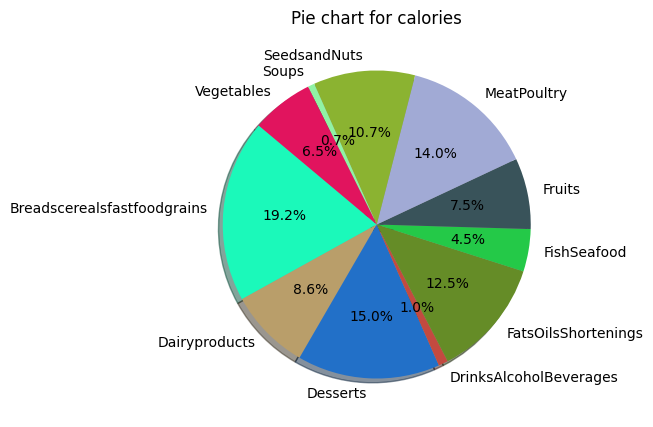

In [39]:
#applying pie chart for calories based on category using matplotlib

cat1 = nutrients['Category'].value_counts()
cal1 = nutrients.groupby('Category')['Calories'].sum()
colors = []
for i in range(len(cal1)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(5, 5))
plt.pie(cal1, labels=cal1.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie chart for calories')
plt.show()

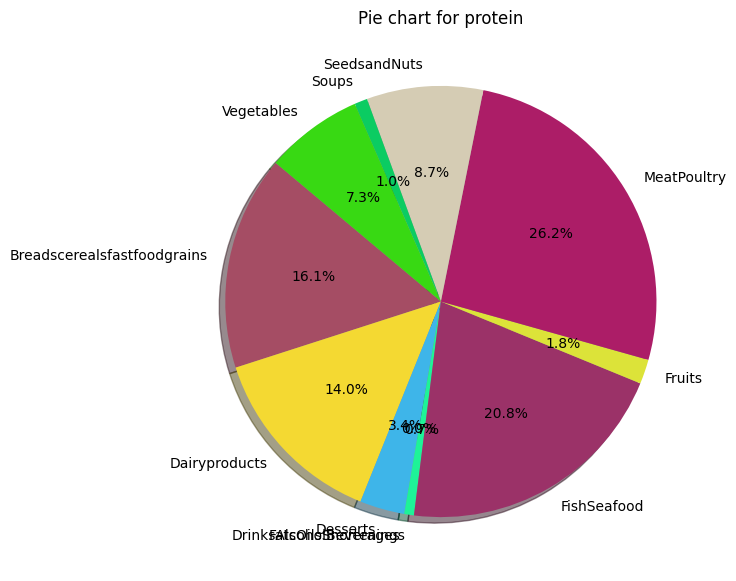

In [40]:
#applying pie chart for protien based on category using matplotlib

prot1 = nutrients['Category'].value_counts()
prot1 = nutrients.groupby('Category')['Protein'].sum()
colors = []
for i in range(len(prot1)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(7, 7))
plt.pie(prot1, labels=prot1.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie chart for protein')
plt.show()

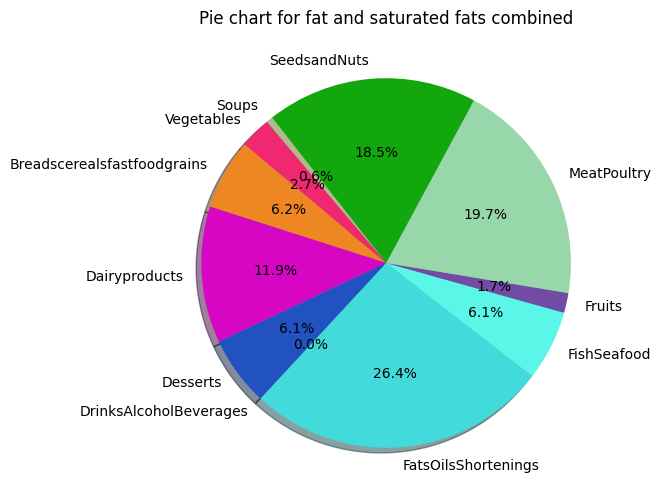

In [41]:
#applying pie chart for fats based on category using matplotlib

fat1 = nutrients['Category'].value_counts()
fat1 = nutrients.groupby('Category')['fats'].sum()
colors = []
for i in range(len(fat1)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(6, 6))
plt.pie(fat1, labels=fat1.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie chart for fat and saturated fats combined')
plt.show()

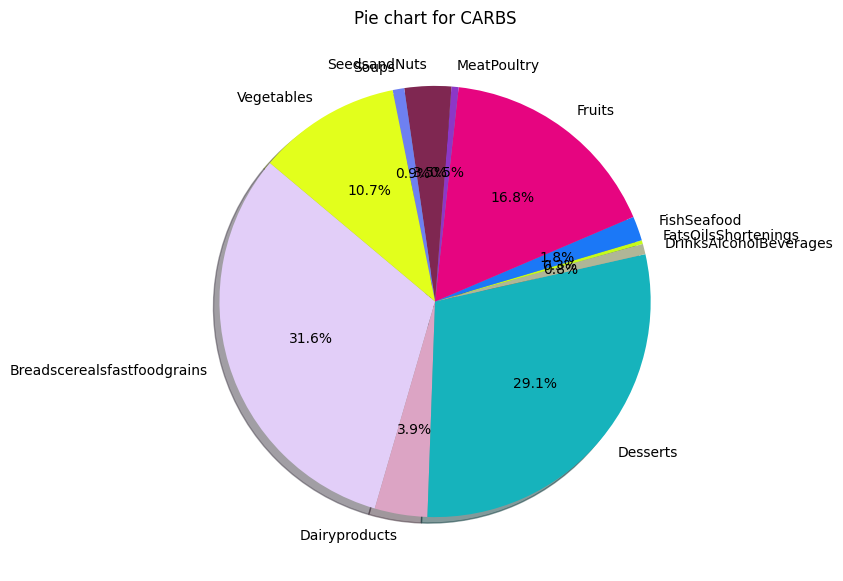

In [42]:
#applying pie chart for Carbs based on category using matplotlib

carb1 = nutrients['Category'].value_counts()
carb1 = nutrients.groupby('Category')['Carbs'].sum()
colors = []
for i in range(len(carb1)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(7, 7))
plt.pie(carb1, labels=carb1.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie chart for CARBS')
plt.show()

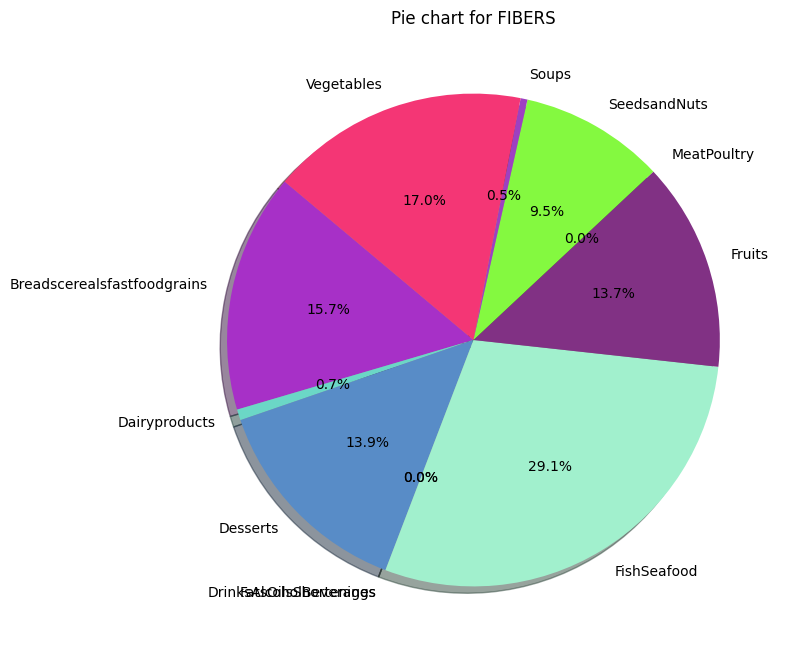

In [43]:
#applying pie chart for fibers based on category using matplotlib

fib1 = nutrients['Category'].value_counts()
fib1 = nutrients.groupby('Category')['Fiber'].sum()
colors = []
for i in range(len(fib1)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(8, 8))
plt.pie(fib1, labels=fib1.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie chart for FIBERS')
plt.show()

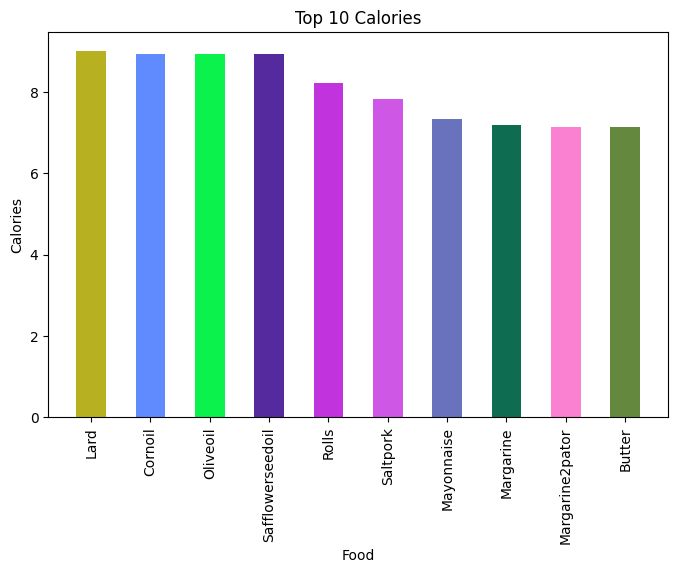

In [44]:
#applying bar chart for top 10 item containing hightest calories

highest_10_calories_fooditem = nutrients.sort_values('Calories', ascending=False).head(10)
colors=[]
for i in range(len(highest_10_calories_fooditem)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(8, 5))
plt.bar(highest_10_calories_fooditem['Food'], highest_10_calories_fooditem['Calories'],width=0.5,color=colors)
plt.title('Top 10 Calories')
plt.xlabel('Food')
plt.ylabel('Calories')
plt.xticks(rotation=90)
plt.show()

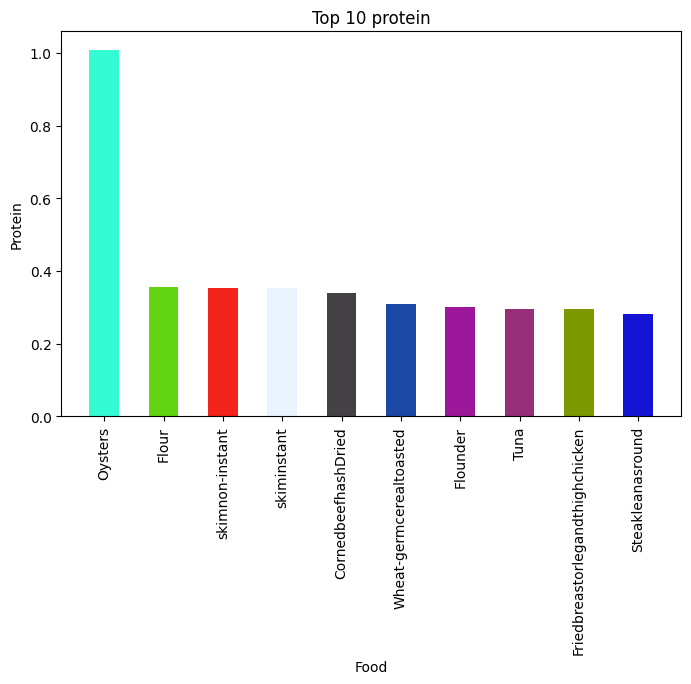

In [45]:
#applying bar chart for top 10 item containing hightest protien

highest_10_protein_fooditem =nutrients.sort_values('Protein', ascending=False).head(10)
colors=[]
for i in range(len(highest_10_protein_fooditem)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(8, 5))
plt.bar(highest_10_protein_fooditem['Food'], highest_10_protein_fooditem['Protein'],width=0.5,color=colors)
plt.title('Top 10 protein')
plt.xlabel('Food')
plt.ylabel('Protein')
plt.xticks(rotation=90)
plt.show()

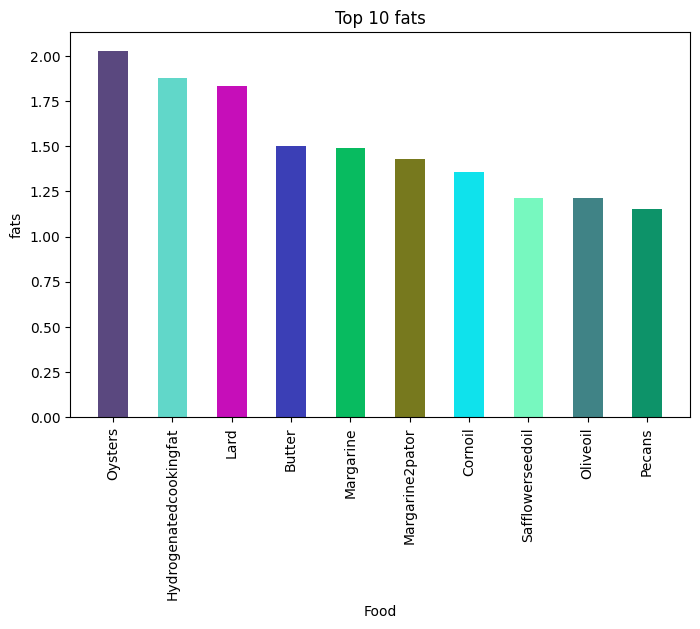

In [46]:
#applying bar chart for top 10 item containing hightest fats

highest_10_fats_fooditem = nutrients.sort_values('fats', ascending=False).head(10)
colors=[]
for i in range(len(highest_10_fats_fooditem)):
    r = rd.random()
    g = rd.random()
    b = rd.random()
    colors.append((r, g, b))
plt.figure(figsize=(8, 5))
plt.bar(highest_10_fats_fooditem['Food'], highest_10_fats_fooditem['fats'],width=0.5,color=colors)
plt.title('Top 10 fats')
plt.xlabel('Food')
plt.ylabel('fats')
plt.xticks(rotation=90)
plt.show()

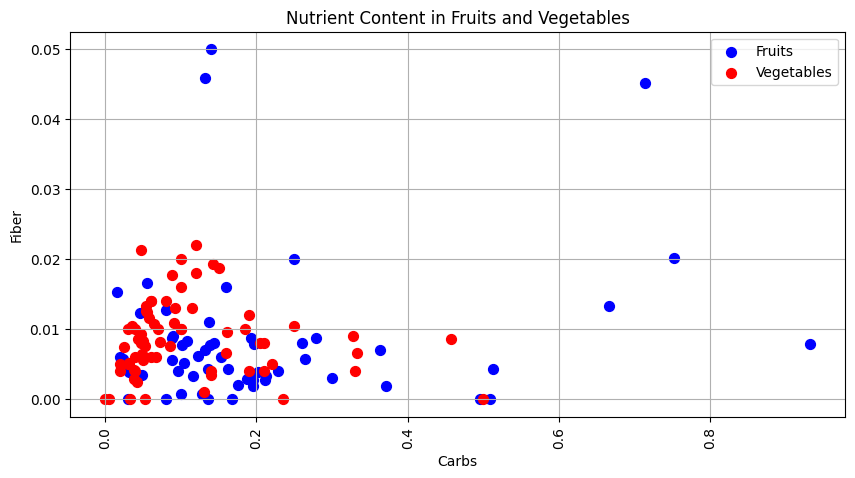

In [47]:
#drawing the scatter chart for comparing nutrients values between fruits and vegetables

fruits = nutrients[nutrients['Category'] == 'Fruits']
vegetables = nutrients[nutrients['Category'] == 'Vegetables']

x_fruits = fruits['Carbs']  
y_fruits = fruits['Fiber']  
x_vegetables = vegetables['Carbs']  
y_vegetables = vegetables['Fiber']  

plt.figure(figsize=(10, 5))
plt.scatter(x_fruits, y_fruits, marker='o', s=50, c='blue', label='Fruits')
plt.scatter(x_vegetables, y_vegetables, marker='o', s=50, c='red', label='Vegetables')
plt.title('Nutrient Content in Fruits and Vegetables')
plt.xlabel('Carbs')
plt.ylabel('Fiber')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

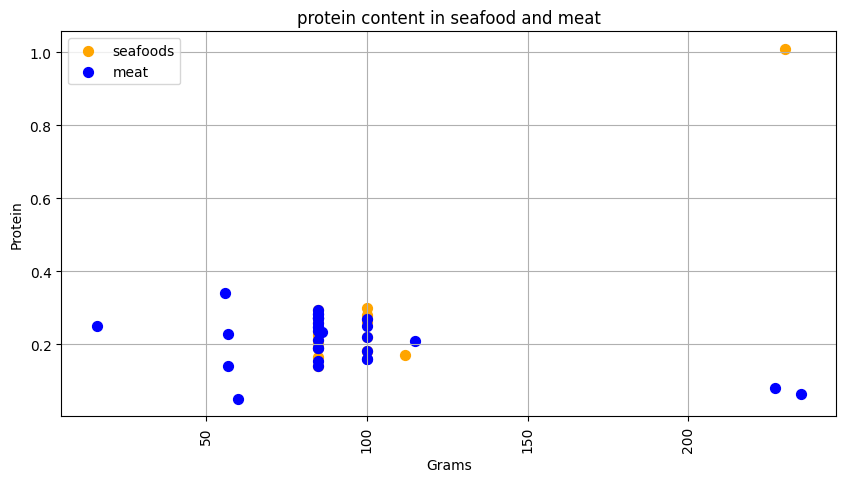

In [48]:
#drawing the scatter chart for comparing proteina and  values between seafood and meat

seafood = nutrients[nutrients['Category'] == 'FishSeafood']
meat = nutrients[nutrients['Category'] == 'MeatPoultry']

x_seafood = seafood['Grams']  
y_seafood = seafood['Protein']  
x_meat = meat['Grams']  
y_meat = meat['Protein']  

plt.figure(figsize=(10, 5))
plt.scatter(x_seafood, y_seafood, marker='o', s=50, c='orange', label='seafoods')
plt.scatter(x_meat, y_meat, marker='o', s=50, c='blue', label='meat')
plt.title('protein content in seafood and meat')
plt.xlabel('Grams')
plt.ylabel('Protein')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

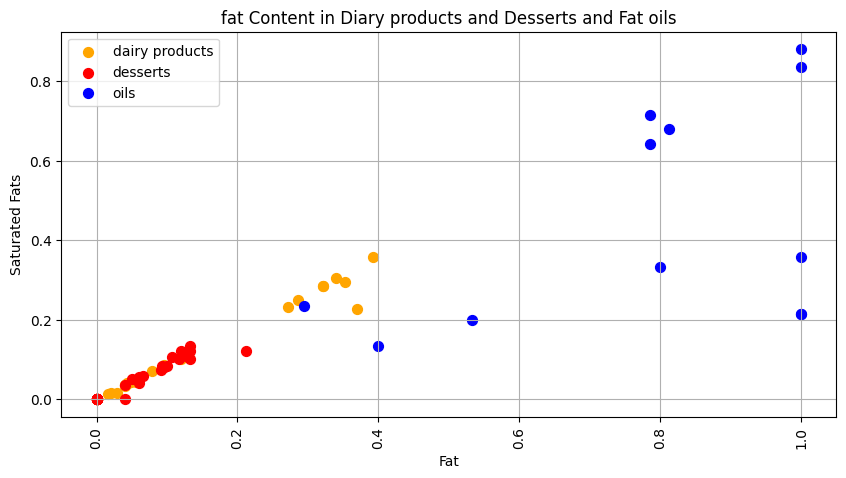

In [49]:
#drawing the scatter chart for comparing fat values between Dairyproducts and Desserts and Fatoils

dairy = nutrients[nutrients['Category'] == 'Dairyproducts']
dessert = nutrients[nutrients['Category'] == 'Desserts']
oils=nutrients[nutrients['Category']=='FatsOilsShortenings']

x_dairy = dairy['Fat']  
y_dairy = dairy['Sat.Fat'] 
x_dessert = dessert['Fat']
y_dessert = dessert['Sat.Fat']
x_oils = oils['Fat']  
y_oils = oils['Sat.Fat']  

plt.figure(figsize=(10, 5))
plt.scatter(x_dairy, y_dairy, marker='o', s=50, c='orange', label='dairy products')
plt.scatter(x_dessert, y_dessert, marker='o', s=50, c='red', label='desserts')
plt.scatter(x_oils, y_oils, marker='o', s=50, c='blue', label='oils')
plt.title('fat Content in Diary products and Desserts and Fat oils')
plt.xlabel('Fat')
plt.ylabel('Saturated Fats')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

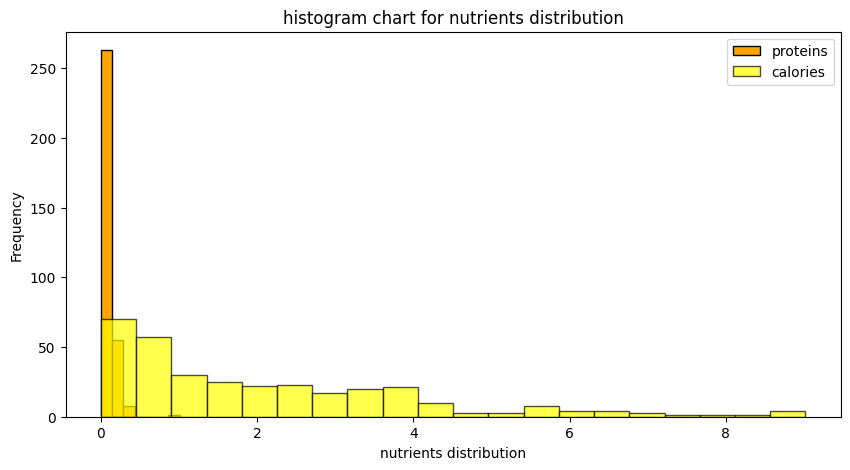

In [50]:
#applying histogram chart for nutrients distribution

plt.figure(figsize=(10, 5))
plt.hist(nutrients['Protein'],bins=7, color='orange', alpha=1.0, label='proteins',edgecolor='black')
plt.hist(nutrients['Calories'], bins=20, color='yellow', alpha=0.7, label='calories',edgecolor='black')
plt.title('histogram chart for nutrients distribution')
plt.xlabel('nutrients distribution')
plt.ylabel('Frequency')
plt.legend()
plt.show()

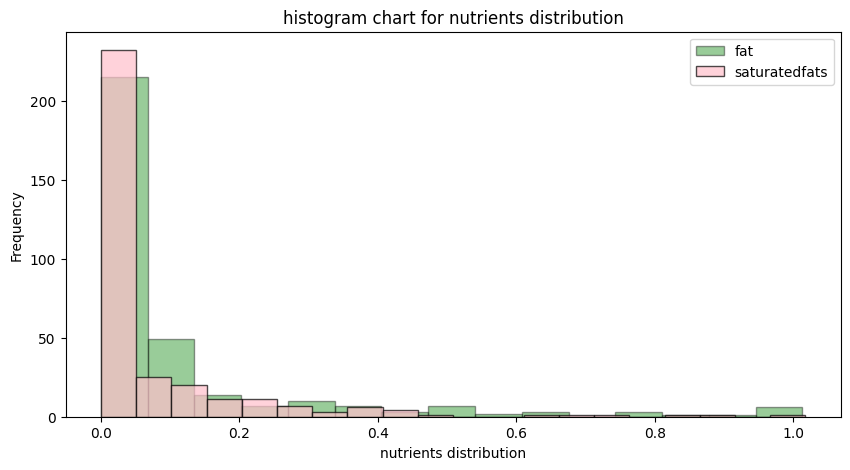

In [51]:
#applying histogram chart for nutrients distribution

plt.figure(figsize=(10, 5))
plt.hist(nutrients['Fat'], bins=15, color='green', alpha=0.4, label='fat',edgecolor='black')
plt.hist(nutrients['Sat.Fat'], bins=20, color='pink', alpha=0.7, label='saturatedfats',edgecolor='black')
plt.title('histogram chart for nutrients distribution')
plt.xlabel('nutrients distribution')
plt.ylabel('Frequency')
plt.legend()
plt.show()

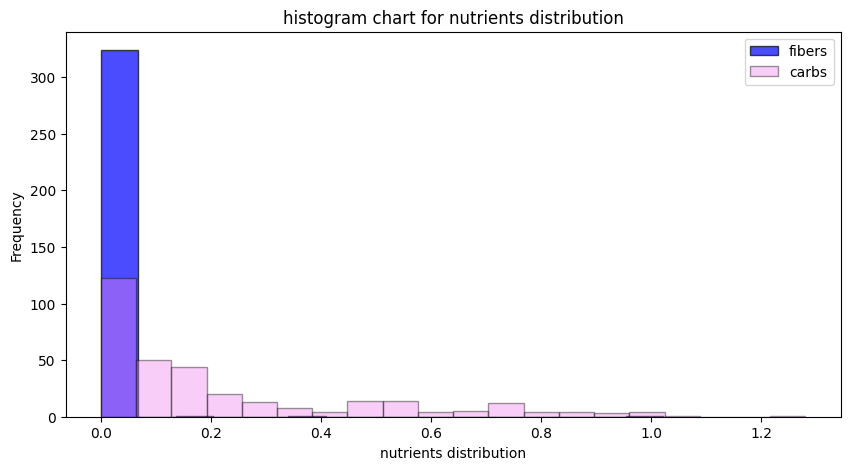

In [52]:
#applying histogram chart for nutrients distribution

plt.figure(figsize=(10, 5))
plt.hist(nutrients['Fiber'], bins=15, color='blue', alpha=0.7, label='fibers',edgecolor='black')
plt.hist(nutrients['Carbs'], bins=20, color='violet', alpha=0.4, label='carbs',edgecolor='black')
plt.title('histogram chart for nutrients distribution')
plt.xlabel('nutrients distribution')
plt.ylabel('Frequency')
plt.legend()
plt.show()

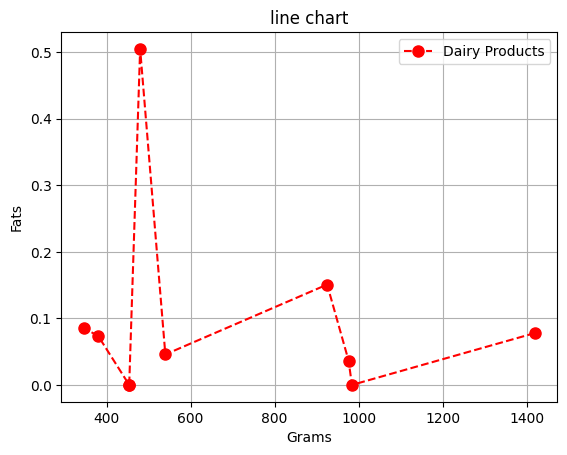

In [53]:
# Sort the data by Grams in descending order and select the top 10 rows of fats

gm = nutrients.sort_values('Grams', ascending=False).head(10)
dairy = nutrients[nutrients['Category'] == 'Dairyproducts']
y_dairy = dairy['fats'].head(10) 
plt.plot(gm['Grams'], y_dairy, linestyle='--', color='red', marker='o', markersize=8, label='Dairy Products')
plt.title('line chart')
plt.xlabel('Grams')
plt.ylabel('Fats')
plt.grid(True)
plt.legend()
plt.show()

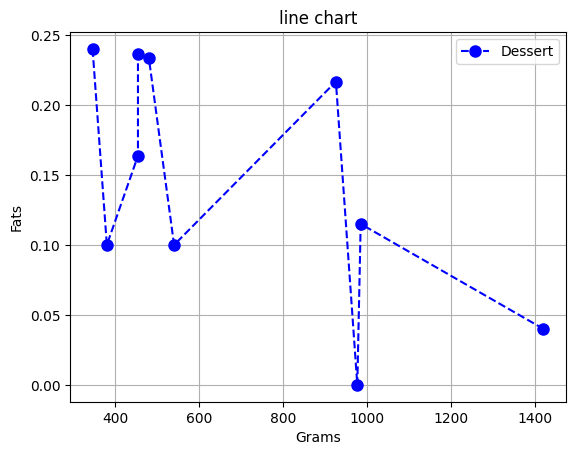

In [54]:
# Sort the data by Grams in descending order and select the top 10 rows of fats

gm = nutrients.sort_values('Grams', ascending=False).head(10)
dessert = nutrients[nutrients['Category'] == 'Desserts']
y_dessert = dessert['fats'].head(10) 
plt.plot(gm['Grams'], y_dessert, linestyle='--', color='blue', marker='o', markersize=8, label='Dessert')
plt.title('line chart')
plt.xlabel('Grams')
plt.ylabel('Fats')
plt.grid(True)
plt.legend()
plt.show()

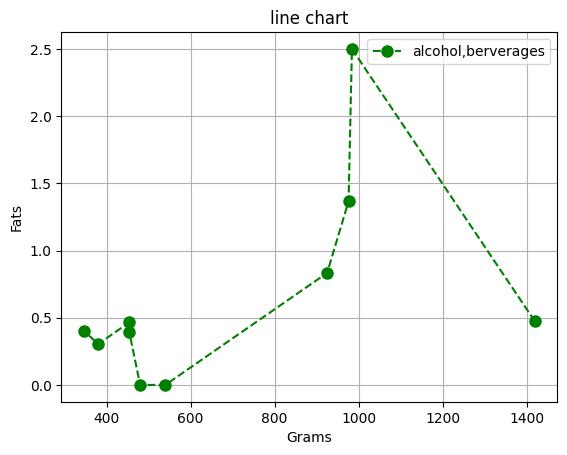

In [55]:
# Sort the data by Grams in descending order and select the top 10 rows of fats

gm = nutrients.sort_values('Grams', ascending=False).head(10)
beverage = nutrients[nutrients['Category'] == 'DrinksAlcoholBeverages']
y_beverage = beverage['Calories'].head(10) 
plt.plot(gm['Grams'], y_beverage, linestyle='--', color='green', marker='o', markersize=8, label='alcohol,berverages')
plt.title('line chart')
plt.xlabel('Grams')
plt.ylabel('Fats')
plt.grid(True)
plt.legend()
plt.show()

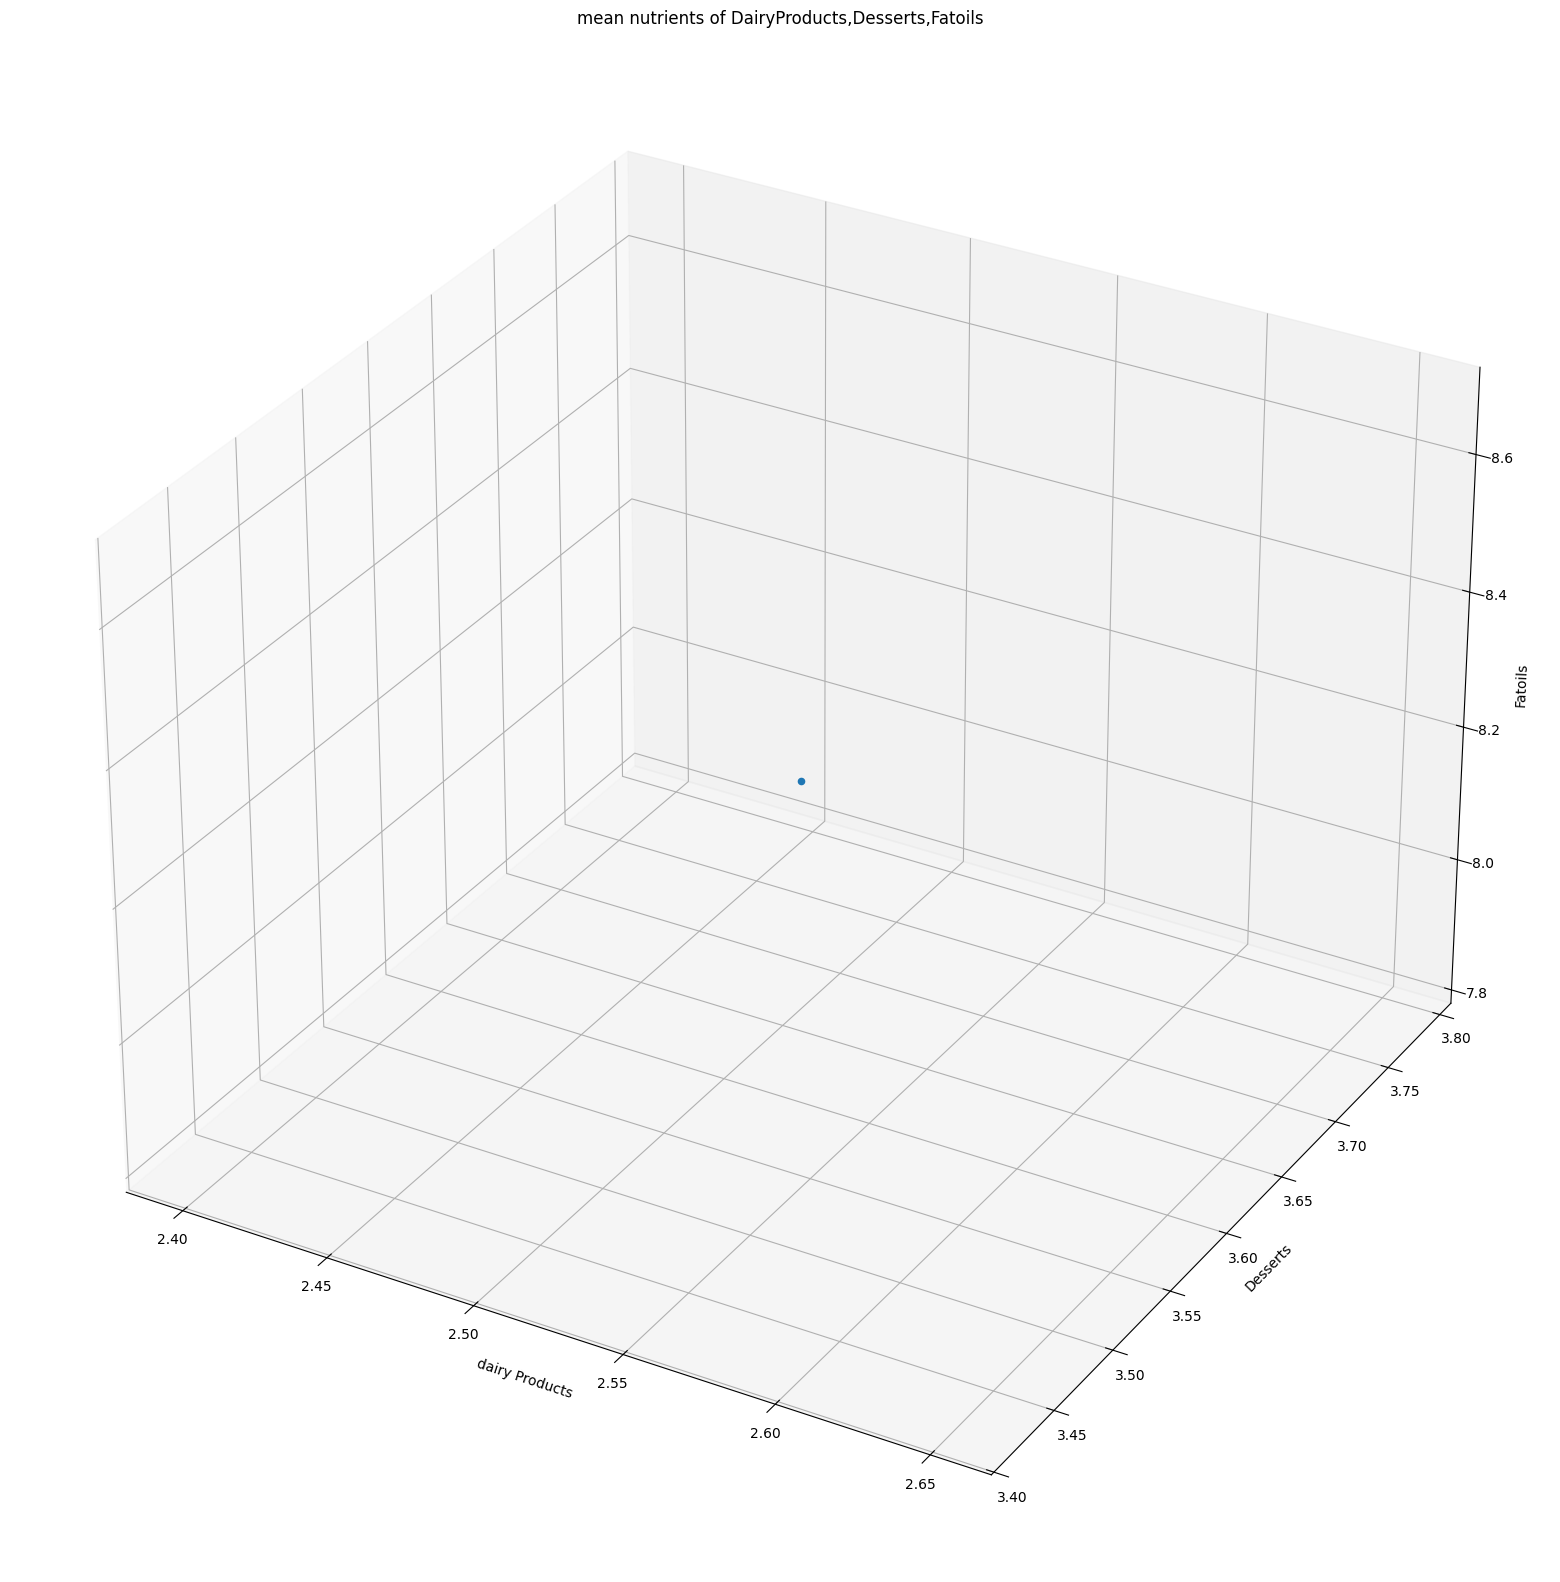

In [56]:
#3d chart for showing the mean instersection of nutreints of category dairyproduct,dessert,oils


dairy = nutrients[nutrients['Category'] == 'Dairyproducts']
x=dairy.groupby('Category')['Calories'].mean() + dairy.groupby('Category')['Protein'].mean() + dairy.groupby('Category')['fats'].mean()+dairy.groupby('Category')['Fiber'].mean()+dairy.groupby('Category')['Carbs'].mean()

dessert = nutrients[nutrients['Category'] == 'Desserts']
y=dessert.groupby('Category')['Calories'].mean() + dessert.groupby('Category')['Protein'].mean() + dessert.groupby('Category')['fats'].mean()+dessert.groupby('Category')['Fiber'].mean()+dessert.groupby('Category')['Carbs'].mean()

oils = nutrients[nutrients['Category'] == 'FatsOilsShortenings']
z=oils.groupby('Category')['Calories'].mean() + oils.groupby('Category')['Protein'].mean() + oils.groupby('Category')['fats'].mean()+oils.groupby('Category')['Fiber'].mean()+oils.groupby('Category')['Carbs'].mean()

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_title('mean nutrients of DairyProducts,Desserts,Fatoils')
ax.set_xlabel('dairy Products')
ax.set_ylabel('Desserts')
ax.set_zlabel('Fatoils')
plt.show()

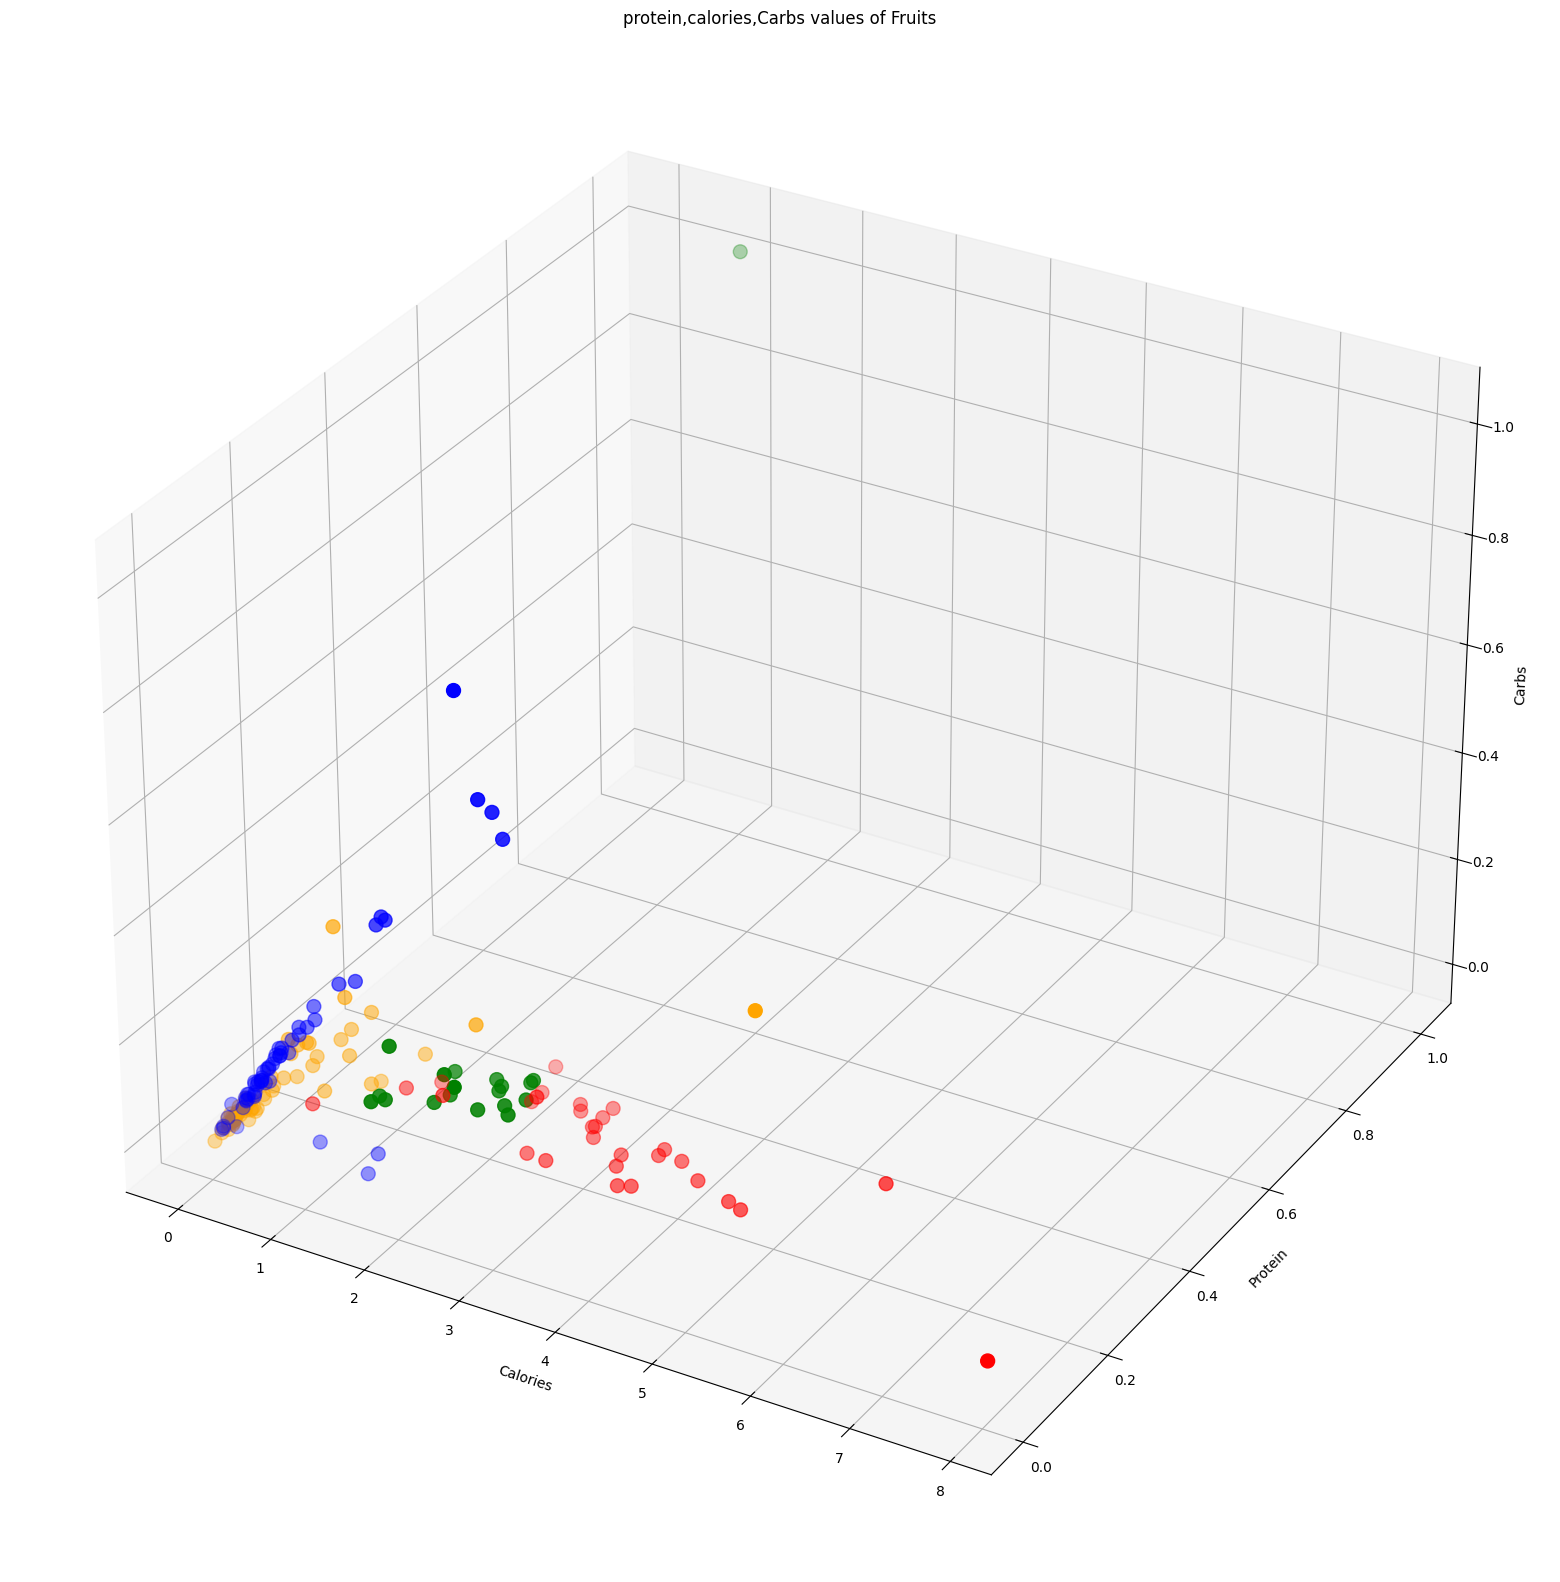

In [57]:
#applying 3d model plot for showing protein,calories,carbs content in fruits

Fruit = nutrients[nutrients['Category'] == 'Fruits']
x=Fruit['Calories']
y=Fruit['Protein']
z=Fruit['Carbs']

veg = nutrients[nutrients['Category'] == 'Vegetables']
x2=veg['Calories']
y2=veg['Protein']
z2=veg['Carbs']

seafood = nutrients[nutrients['Category'] == 'FishSeafood']
x3=seafood['Calories']
y3=seafood['Protein']
z3=seafood['Carbs']

meat = nutrients[nutrients['Category'] == 'MeatPoultry']
x4=meat['Calories']
y4=meat['Protein']
z4=meat['Carbs']

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('protein,calories,Carbs values of Fruits')
ax.scatter(x, y, z,c='blue',label='Fruits',s=100)
ax.scatter(x2, y2, z2,c='orange',label='vegetables',s=100)
ax.scatter(x3, y3, z3,c='green',label='seafood',s=100)
ax.scatter(x4, y4, z4,c='red',label='meatPloutry',s=100)
ax.set_xlabel('Calories')
ax.set_ylabel('Protein')
ax.set_zlabel('Carbs')
plt.show()
